<a href="https://colab.research.google.com/github/ta7er-Alalfi/T7-/blob/main/House_Price_Prediction_t7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
train_url = "https://raw.githubusercontent.com/ta7er-Alalfi/T7-/refs/heads/main/house-prices-advanced-regression-techniques/train.csv"
test_url = "https://raw.githubusercontent.com/ta7er-Alalfi/T7-/refs/heads/main/house-prices-advanced-regression-techniques/test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [44]:

display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
#عرض اخر 5 rows
display(train.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [46]:
print(f"Train shape: {train.shape}")
print(f"Test shape : {test.shape}")

Train shape: (1460, 81)
Test shape : (1459, 80)


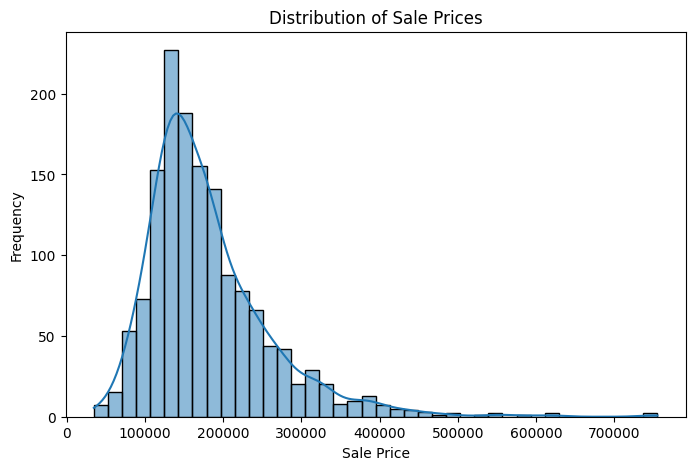

In [47]:
#توزيع الاسعار
plt.figure(figsize=(8,5))
sns.histplot(train["SalePrice"], kde=True, bins=40)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

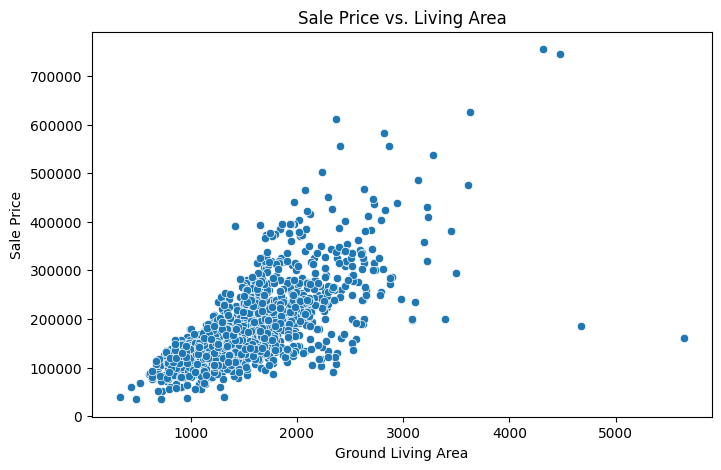

In [48]:
#السعر مقابل المساحه
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train)
plt.title("Sale Price vs. Living Area")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.show()

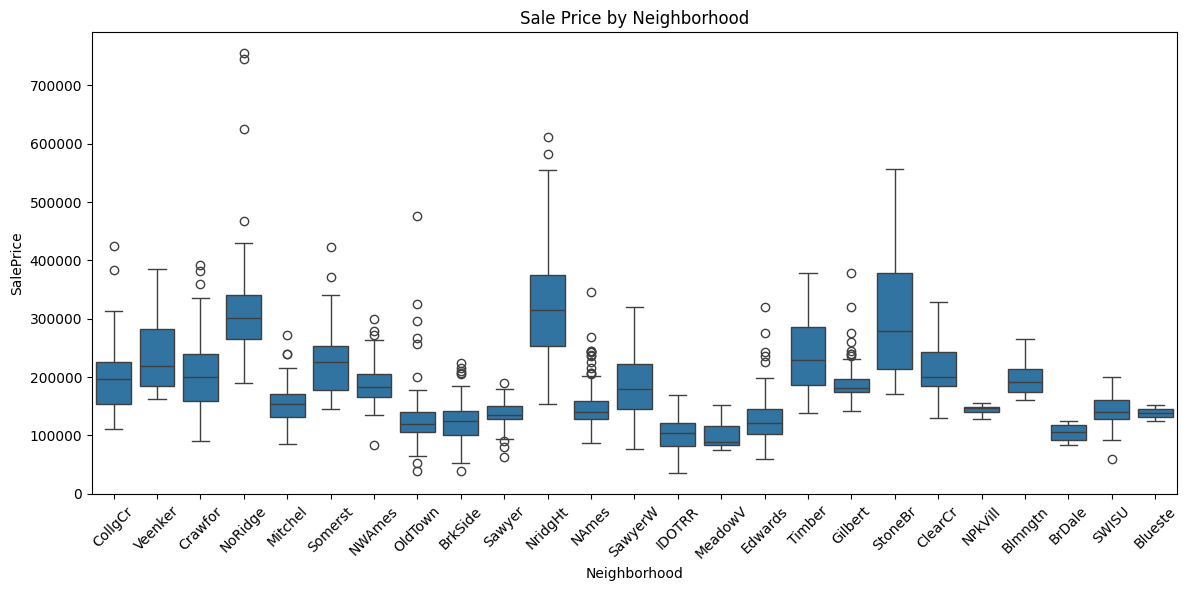

In [49]:
#السعر حسب المكان
plt.figure(figsize=(14,6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train)
plt.xticks(rotation=45)
plt.title("Sale Price by Neighborhood")
plt.show()

In [50]:
# عرض القيم المفقودة في كل عمود
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test  = test_df.isnull().sum().sort_values(ascending=False)

print("Top missing values in Train:")
print(missing_train.head(10))
print("\nTop missing values in Test:")
print(missing_test.head(10))


Top missing values in Train:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

Top missing values in Test:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
dtype: int64
